In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [42]:
series_sum_sales = df.groupby("ORDERDATE")["SALES"].sum()

In [44]:
print(len(series_sum_sales))

252


In [45]:
import numpy as np

In [82]:
df_sum_sales = pd.DataFrame(series_sum_sales,dtype='object')
df_sum_sales["ds"] = pd.to_datetime(df_sum_sales.index)
df_sum_sales = df_sum_sales.rename(columns={"SALES":"y"})
df_sum_sales = df_sum_sales.sort_values(by=["ds"])
df_sum_sales = df_sum_sales.set_index(np.arange(len(series_sum_sales)))
df_sum_sales.head()

,y,ds
0,12133.2,2003-01-06
1,11432.3,2003-01-09
2,6864.05,2003-01-10
3,54702,2003-01-29
4,44622,2003-01-31


In [73]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [90]:
m = Prophet(yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True)

m.fit(df_sum_sales[['ds','y']])

future = m.make_future_dataframe(periods=365)
future.tail()



,ds
612,2006-05-27
613,2006-05-28
614,2006-05-29
615,2006-05-30
616,2006-05-31


In [93]:
forecast = m.predict(future)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
612,2006-05-27,25330.695555,10689.707944,77415.993968,25320.714348,25340.192153,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,0.0,0.0,0.0,44853.385193
613,2006-05-28,25337.382550,11447.554767,75807.137511,25327.363919,25346.910790,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,0.0,0.0,0.0,44860.072187
614,2006-05-29,25344.069544,13732.964420,78029.384848,25334.016474,25353.629426,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,0.0,0.0,0.0,44866.759182
615,2006-05-30,25350.756538,10399.719222,78472.675477,25340.669029,25360.345155,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,0.0,0.0,0.0,44873.446176
616,2006-05-31,25357.443533,11132.436575,75893.483198,25347.322698,25367.059329,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,19522.689638,0.0,0.0,0.0,44880.133170


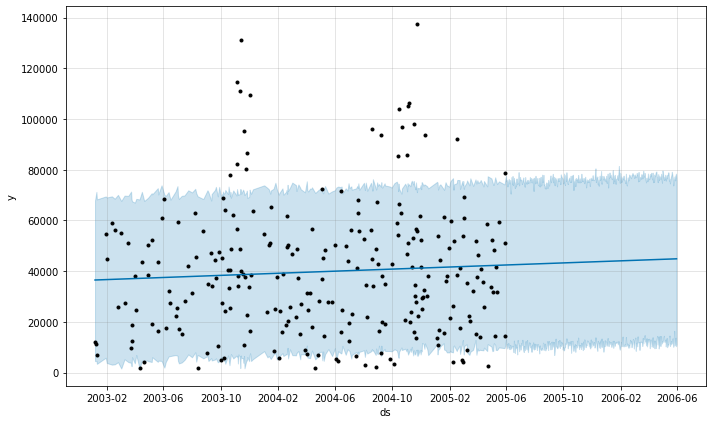

In [94]:
fig1 = m.plot(forecast)
